In [1]:
%load_ext autoreload
%autoreload 2

In [79]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from skimage.transform import rescale
import math
from skimage.metrics import structural_similarity as ssim
from sklearn.metrics import mean_squared_error as mse


from pylab import rcParams
rcParams['figure.figsize'] = 16, 9

sys.path.append('..')

from utils.dataset import DatasetReader

# Build Dataset

In [14]:
dr = DatasetReader(dataset=1, dataset_path='../temp/PUC_DIR')
x_1, y_1 = dr.get_dataset(scale=2)

In [15]:
# check shapes
len(x_1), x_1[0].shape, len(y_1), y_1[0].shape

(1472, (32, 32), 1472, (64, 64))

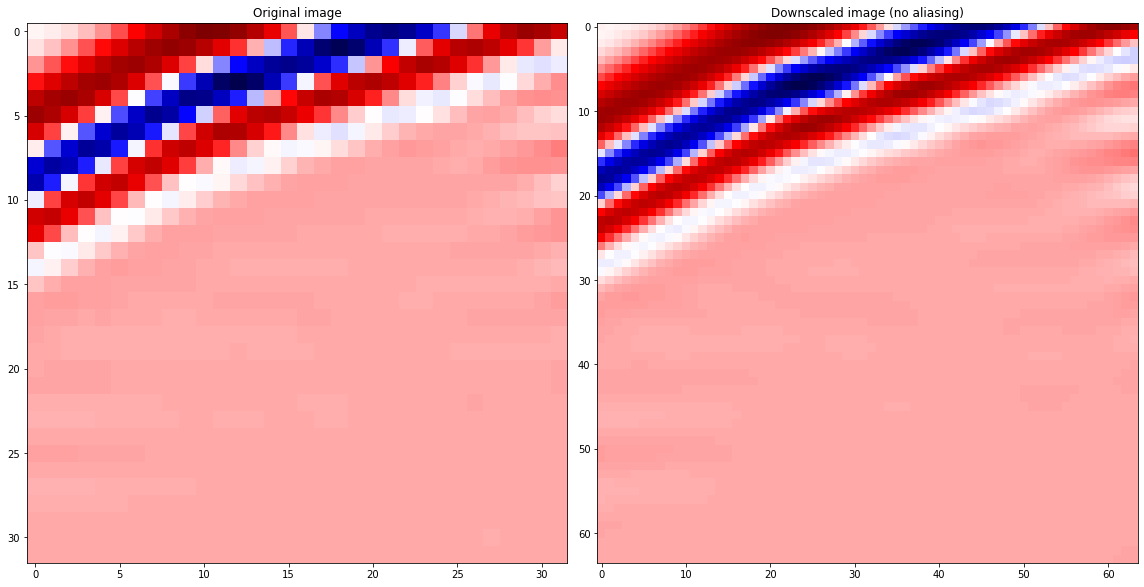

In [16]:
fig, axes = plt.subplots(ncols=2)

ax = axes.ravel()

ax[0].imshow(x_1[982], cmap='seismic')
ax[0].set_title("Original image")

ax[1].imshow(y_1[982], cmap='seismic')
ax[1].set_title("Downscaled image (no aliasing)")

plt.tight_layout()
plt.show()

In [90]:
dr2 = DatasetReader(dataset=2, dataset_path='../temp/PUC_DIR')
x_2, y_2 = dr2.get_dataset(scale=2)

x_1_4x, y_1_4x = dr.get_dataset(scale=4)
x_2_4x, y_2_4x = dr2.get_dataset(scale=4)

# Baseline

Performs interpolation to up-scale

In [13]:
def baseline(x, scale=2):
    return [rescale(img, scale, anti_aliasing=False) for img in x]

In [93]:
y_pred = baseline(x_1)
y_pred2 = baseline(x_2)

y_pred_4x = baseline(x_1_4x, scale=4)
y_pred2_4x = baseline(x_2_4x, scale=4)

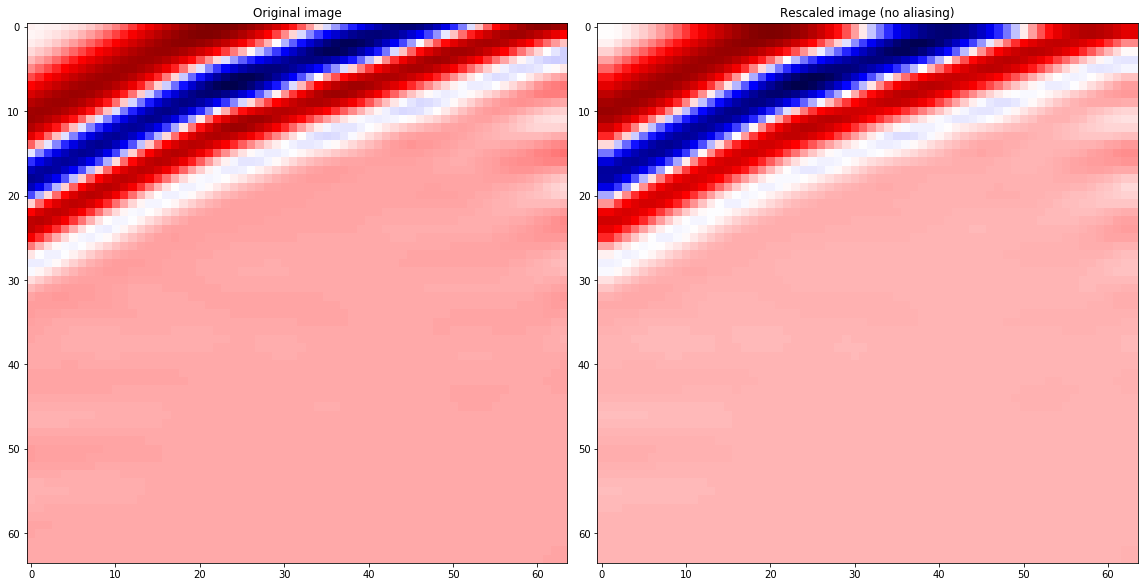

In [18]:
fig, axes = plt.subplots(ncols=2)

ax = axes.ravel()

ax[0].imshow(y_1[982], cmap='seismic')
ax[0].set_title("Original image")

ax[1].imshow(y_pred[982], cmap='seismic')
ax[1].set_title("Rescaled image (no aliasing)")

plt.tight_layout()
plt.show()

# Metrics

### PSNR

In [54]:
PIXEL_MAX = 0
for i in y_1:
    if i.max() > PIXEL_MAX:
        PIXEL_MAX = i.max()
PIXEL_MAX

0.99999994

In [55]:
def psnr(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return 100
    PIXEL_MAX = 1
    return 20 * math.log10(PIXEL_MAX / math.sqrt(mse))

In [58]:
psnr(y_1[410], y_pred[410])

78.00575706371988

In [59]:
psnr_sum = 0

for i in range(len(y_1)):
    psnr_sum += psnr(y_1[i], y_pred[i])

print(f"Mean PSNR {psnr_sum/len(y_1)}")

Mean PSNR 62.187412917262506


In [85]:
psnr_sum = 0

for i in range(len(y_2)):
    psnr_sum += psnr(y_2[i], y_pred2[i])

print(f"Mean PSNR {psnr_sum/len(y_2)}")

Mean PSNR 54.69350536093944


#### 4x

In [94]:
psnr_sum = 0

for i in range(len(y_1_4x)):
    psnr_sum += psnr(y_1_4x[i], y_pred_4x[i])

print(f"Mean PSNR {psnr_sum/len(y_1_4x)}")

Mean PSNR 55.2210433981328


In [95]:
psnr_sum = 0

for i in range(len(y_2_4x)):
    psnr_sum += psnr(y_2_4x[i], y_pred2_4x[i])

print(f"Mean PSNR {psnr_sum/len(y_2_4x)}")

Mean PSNR 47.78694262315913


### SSIM

In [77]:
round(ssim(y_1[410], y_pred[410]), 4)

1.0

In [78]:
ssim_sum = 0

for i in range(len(y_1)):
    ssim_sum += ssim(y_1[i], y_pred[i])

print(f"Mean SSIM {round(ssim_sum/len(y_1), 4)}")

Mean SSIM 0.9958


In [86]:
ssim_sum = 0

for i in range(len(y_2)):
    ssim_sum += ssim(y_2[i], y_pred2[i])

print(f"Mean SSIM {round(ssim_sum/len(y_2), 4)}")

Mean SSIM 0.9957


#### 4x

In [96]:
ssim_sum = 0

for i in range(len(y_1_4x)):
    ssim_sum += ssim(y_1_4x[i], y_pred_4x[i])

print(f"Mean SSIM {round(ssim_sum/len(y_1_4x), 4)}")

Mean SSIM 0.9543


In [97]:
ssim_sum = 0

for i in range(len(y_2_4x)):
    ssim_sum += ssim(y_2_4x[i], y_pred2_4x[i])

print(f"Mean SSIM {round(ssim_sum/len(y_2_4x), 4)}")

Mean SSIM 0.9717


### MSE

In [82]:
mse_sum = 0

for i in range(len(y_1)):
    mse_sum += mse(y_1[i], y_pred[i])

print(f"Mean MSE {mse_sum/len(y_1)}")

Mean MSE 6.485924624082256e-05


In [87]:
mse_sum = 0

for i in range(len(y_2)):
    mse_sum += mse(y_2[i], y_pred2[i])

print(f"Mean MSE {mse_sum/len(y_2)}")

Mean MSE 0.00012104836118874194


#### 4x

In [98]:
mse_sum = 0

for i in range(len(y_1_4x)):
    mse_sum += mse(y_1_4x[i], y_pred_4x[i])

print(f"Mean MSE {mse_sum/len(y_1_4x)}")

Mean MSE 0.0005543939141001952


In [99]:
mse_sum = 0

for i in range(len(y_2_4x)):
    mse_sum += mse(y_2_4x[i], y_pred2_4x[i])

print(f"Mean MSE {mse_sum/len(y_2_4x)}")

Mean MSE 0.00074752398223288
